<b>Task:</b>
- Case 1. Transforming data: encode categorical features, delete empties cells.
- Case 2. Split a prepared dataset to a train and a test subsets.
- Case 3. Construct a ROC Curve using SKLearn.
- Case 4. Determine a ROC AUC Score (Area under curve) using SKLearn.
- Case 5. Write own fucntions that calculate scores such TPR, FPR.
- Case 6. Using functions from Case 5 to construct a ROC Curve.
- Case 7. Construct a graphic Precision-Recall.
- Case 8. Write a function that determines a  ROC AUC Score.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('datasets_features/athletes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [72]:
# Case 1. drop empty
df = df[~(df['height'].isna())]
df = df[~(df['weight'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [73]:
# Case 1. Transforming of string categories.
from sklearn.preprocessing import LabelEncoder

data = df

le = LabelEncoder()
le.fit(data['sex'])
data['gender num'] = le.transform(data['sex'])  

data = pd.get_dummies(df, columns=['nationality', 'sport'])

data.head()

,id,name,sex,dob,height,weight,gold,silver,bronze,gender num,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,736041664,A Jesus Garcia,male,10/17/69,1.72,64.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,532037425,A Lam Shin,female,9/23/86,1.68,56.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,435962603,Aaron Brown,male,5/27/92,1.98,79.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,521041435,Aaron Cook,male,1/2/91,1.83,80.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,33922579,Aaron Gate,male,11/26/90,1.81,71.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Calulate age of sportsman
from datetime import date

def determine_year(year:int):
    if year <= (date.today().year-2000):
        return 2000+year
    else:
        return 1900+year

def calculateAge(line):
    today = date.today()
    birth = line.split('/')
    year_birth = determine_year(int(birth[2]))
    birth = date(year_birth, int(birth[0]), int(birth[1]))
    age = today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))
    return age
    
    
data['Age'] = data['dob'].apply(calculateAge)
data[['dob','Age']][:4]

,dob,Age
0,10/17/69,53
1,9/23/86,36
2,5/27/92,31
3,1/2/91,32


In [75]:
# Case 2. Split to train and test datasets
from sklearn.model_selection import train_test_split

# Dataset 1
y_1 = data['gender num']
X_1 = data.iloc[:, 4:]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

#Dataset 2
y_2 = y_1
X_2 = data.iloc[:, 4:8]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

#Dataset 3
y_3 = y_1
X_3 = data.iloc[:, 12:14]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

dataset 1 roc_auc_score:  1.0
dataset 2 roc_auc_score:  0.8509160028468971
dataset 3 roc_auc_score:  0.5052968711505296


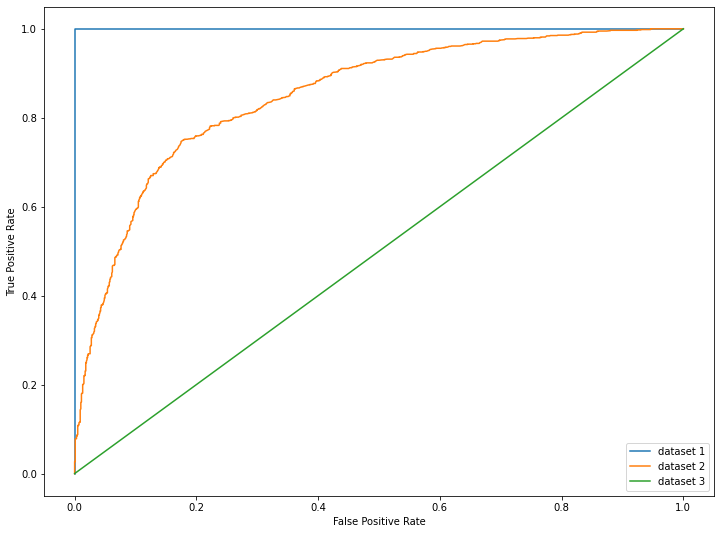

In [76]:
#Cases 3, 4 ROC AUC Curve and ROC AUC score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

logreg = LogisticRegression()

# Calculate fpr and tpr for threshold [1, 0]
logreg.fit(X_train_1, y_train_1)
fpr_1, tpr_1, threshold_1 = roc_curve(y_test_1, logreg.predict_proba(X_test_1)[:, 1])
print('dataset 1 roc_auc_score: ', roc_auc_score(y_test_1, logreg.predict_proba(X_test_1)[:, 1]))

logreg.fit(X_train_2, y_train_2)
fpr_2, tpr_2, threshold_2 = roc_curve(y_test_2, logreg.predict_proba(X_test_2)[:, 1])
print('dataset 2 roc_auc_score: ', roc_auc_score(y_test_2, logreg.predict_proba(X_test_2)[:, 1]))

logreg.fit(X_train_3, y_train_3)
fpr_3, tpr_3, threshold_3 = roc_curve(y_test_3, logreg.predict_proba(X_test_3)[:, 1])
print('dataset 3 roc_auc_score: ', roc_auc_score(y_test_3, logreg.predict_proba(X_test_3)[:, 1]))

#for line in zip(fpr_2, tpr_2, threshold_2):
#    print(line)


# Construct ROC AUC curves
plt.figure(figsize=(12,9))
plt.plot(fpr_1, tpr_1, label='dataset 1')
plt.plot(fpr_2, tpr_2, label='dataset 2')
plt.plot(tpr_3, tpr_3, label='dataset 3')
plt.legend(loc=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [77]:
# Case 5. Own functions: tpr fpr scores.

def get_thuth_matrix(y_true, y_pred, tr=0.5):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    
    for i in range(len(y_true)-1):
        if y_pred[i] >= tr:  
            if y_true.iloc[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if y_true.iloc[i] == 1:
                fn += 1
            else:
                tn += 1
    return {'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn}
    


def tpr_score(y_true, y_pred, tr=0.5):
    tm = get_thuth_matrix(y_true, y_pred, tr)
    
    return tm['tp']/(tm['tp']+tm['fn'])


def fpr_score(y_true, y_pred, tr=0.5):
    tm = get_thuth_matrix(y_true, y_pred, tr)
    
    return tm['fp']/(tm['fp']+tm['tn'])    


def precision_score(y_true, y_pred, tr=0.5):
    tm = get_thuth_matrix(y_true, y_pred, tr)
    
    return 0 if tm['tp'] == 0 else tm['tp']/(tm['tp']+tm['fp']) 


def roc_auc_curve(y_true, y_pred, step_thr=0.01):
    tpr = []
    fpr = []
    thr = []
    for tr in np.arange(1.0, 0.0, -step_thr):
        #print(tr)
        thr.append(tr)
        tpr.append(tpr_score(y_true, y_pred, tr))
        fpr.append(fpr_score(y_true, y_pred, tr))
    return (tpr, fpr, thr)


def pr_curve(y_true, y_pred):
    tpr = []
    precisions = []
    thr = []
    for tr in np.arange(0.0, 1.0, 0.01):
        #print(tr)
        thr.append(tr)
        tpr.append(tpr_score(y_true, y_pred, tr))
        precisions.append(precision_score(y_true, y_pred, tr))
    return (tpr, precisions, thr)

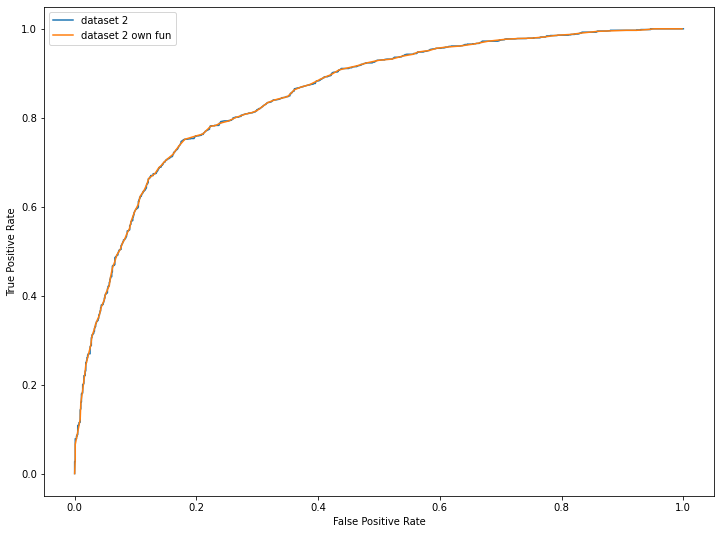

In [78]:
# Case 6. ROC AUC
# Свои функции применяю только на втором дата сете
logreg.fit(X_train_2, y_train_2)

tpr_own, fpr_own, thr_orn = roc_auc_curve(y_test_2, logreg.predict_proba(X_test_2)[:, 1])


 
#for line in zip(fpr_own, tpr_own, thr_orn):
#    print(line)

# Graphics of SKlearn AUC ROC and own AUC ROC
plt.figure(figsize=(12,9))
plt.plot(fpr_2, tpr_2, label='dataset 2')
plt.plot(fpr_own, tpr_own, label='dataset 2 own fun')
plt.legend(loc=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

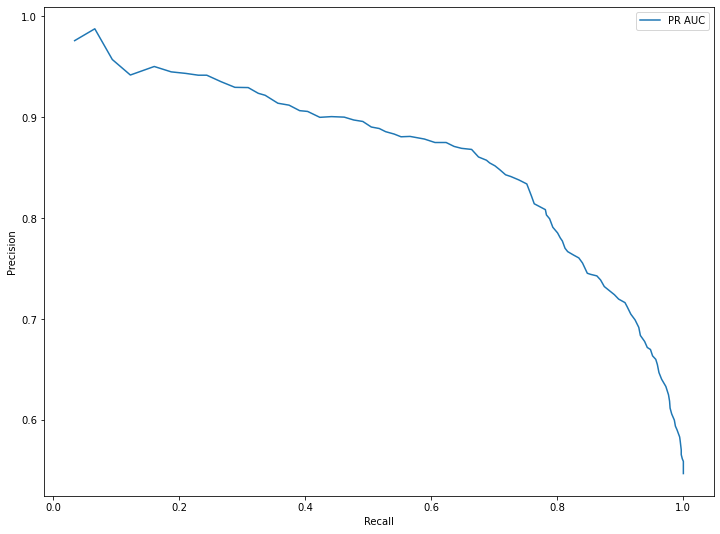

In [62]:
# Case 7
recall_own, precisions_own, thr_orn = pr_curve(y_test_2, logreg.predict_proba(X_test_2)[:, 1])

# Graphics of SKlearn AUC ROC and own AUC ROC
plt.figure(figsize=(12,9))
plt.plot(recall_own, precisions_own, label='PR AUC')
plt.legend(loc=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

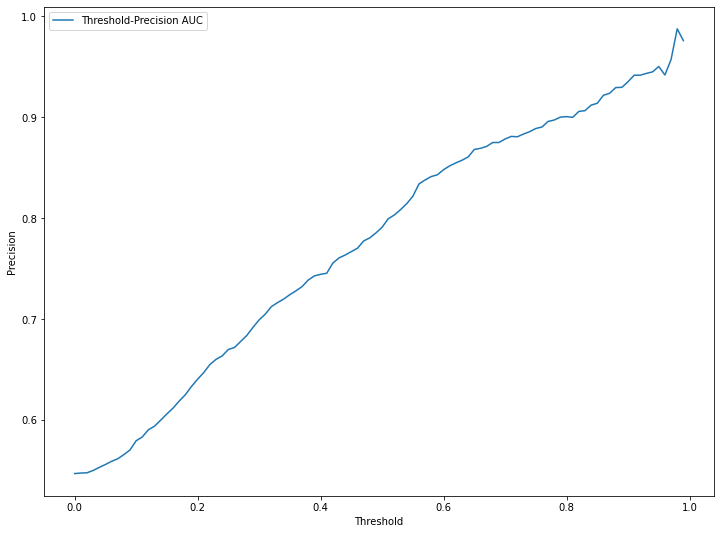

In [63]:
# Case 7
recall_own, precisions_own, thr_orn = pr_curve(y_test_2, logreg.predict_proba(X_test_2)[:, 1])

# Graphics of SKlearn AUC ROC and own AUC ROC
plt.figure(figsize=(12,9))
plt.plot(thr_orn, precisions_own, label='Threshold-Precision AUC')
plt.legend(loc=0)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

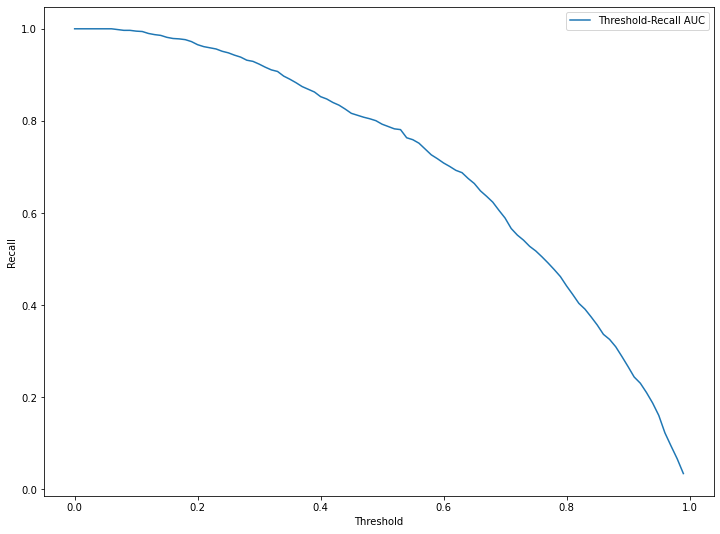

In [64]:
# Case 7
recall_own, precisions_own, thr_orn = pr_curve(y_test_2, logreg.predict_proba(X_test_2)[:, 1])

# Graphics of SKlearn AUC ROC and own AUC ROC
plt.figure(figsize=(12,9))
plt.plot(thr_orn, recall_own, label='Threshold-Recall AUC')
plt.legend(loc=0)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.show()

In [80]:
# Case 8
#Не нашел формулы для собственной реализации roc_auc_score. 
#Посчитал, как производную (сумму прямоугольников с маленьким шагом трешхолда).

def my_roc_auc_score_(y_true, y_pred):
    roc_auc_score_ = 0.0
    tpr_own_, fpr_own_, thr_orn_ = roc_auc_curve(y_true, y_pred, step_thr=0.0001)
    auc_curve_set = list(zip(fpr_own_, tpr_own_, thr_orn_))
    for i in range(1, len(auc_curve_set)):
        a = auc_curve_set[i][0] - auc_curve_set[i-1][0]
        b = auc_curve_set[i][1]
        roc_auc_score_ += (a*b)
    return roc_auc_score_

print('own roc_auc_score: ', my_roc_auc_score_(y_test_2, logreg.predict_proba(X_test_2)[:, 1]))

print('dataset 2 roc_auc_score SKLearn: ', roc_auc_score(y_test_2, logreg.predict_proba(X_test_2)[:, 1]))

own roc_auc_score:  0.8515292703474624
dataset 2 roc_auc_score SKLearn:  0.8509160028468971


<b>Вывод 1: </b>
По построенным AUC и PR графикам можно судить о качестве модели: чем больше площадь под ними тем выше ее предсказаетльные возможности.
1) ROC Curve в идеальном случае достигает максимальной оценки Recall при нулевом FPR , т.е. накапливает Правдиво-Позитивные, не набирая при этом Ложно-Позитивных случаев. Далее после нахождения всех Правдиво-Позитивных, начинает накапливаться Ложно-Позитивные случаи, тем самым двигая график вправо до тех пор пока не останется Правдиво-Негативных случаев. Более показательна для сбалансированных классов.
2) PR Curve показывает с какой скоростью и в каких пропорциях растет оценка Precision и падает оценка Recall с увелечением threshold. Идельным случаем является когда достигается точка (1,1). Данный график более показателен для несбалансированных классов.


<b>Вывод 2: </b>
Думаю, что ROC Curve может быть ниже диагонали, например, когда повышая порог у нас TP не вырос (положительные классы остались отрицательными), но вырос FP (какие то отрицательные классы перетекли в положительные). Таким образом площадь под графиком будет стремиться к нулю.
Можно сказать, что в данном случае модель "предсказывает антизначения".